In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from numpy import median
init_notebook_mode(connected=True)
%matplotlib inline 

In [4]:
ipl_deliveries=pd.read_csv('/content/deliveries.csv')
ipl_matches=pd.read_csv('/content/matches.csv')

In [5]:
print(ipl_deliveries.batting_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants']


In [6]:
print("Total number of batsmen are :", len(ipl_deliveries.batsman.unique()))
print("Total number of bowlewr are :", len(ipl_deliveries.bowler.unique()))

Total number of batsmen are : 461
Total number of bowlewr are : 356


In [7]:
print("Number of matches played are :",len(ipl_deliveries.match_id.unique()))

Number of matches played are : 636


In [9]:
Matches_at_Venu=ipl_matches.groupby('venue').count()[['id']].reset_index()

In [10]:
Matches_at_Venu.head(10)

,venue,id
0,Barabati Stadium,7
1,Brabourne Stadium,11
2,Buffalo Park,3
3,De Beers Diamond Oval,3
4,Dr DY Patil Sports Academy,17
5,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,11
6,Dubai International Cricket Stadium,7
7,Eden Gardens,61
8,Feroz Shah Kotla,60
9,Green Park,4


Text(0, 0.5, 'Stadium')

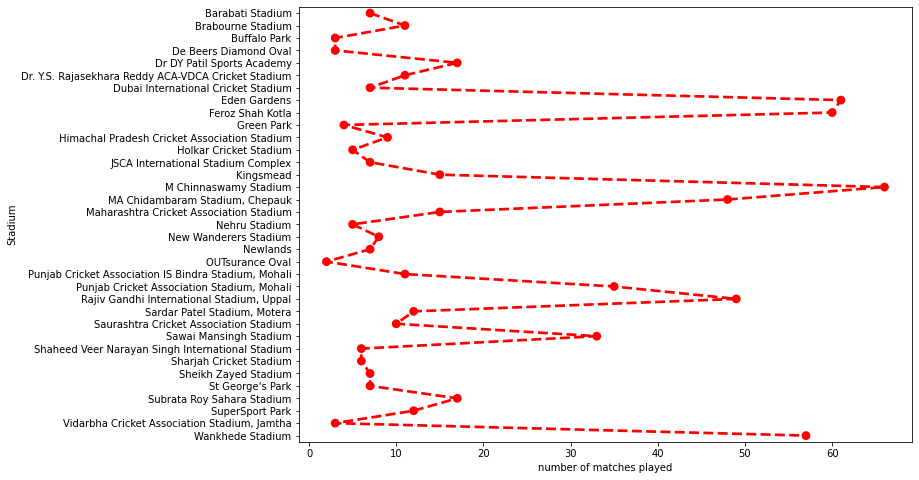

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.pointplot(y='venue',x='id',data=Matches_at_Venu,figsize=(20,20),linestyles="--",markers='o',color='r')
ax.set_xlabel("number of matches played")
ax.set_ylabel("Stadium")

In [13]:
ipm1=ipl_matches.groupby(by='winner').sum()[['win_by_runs','win_by_wickets']]


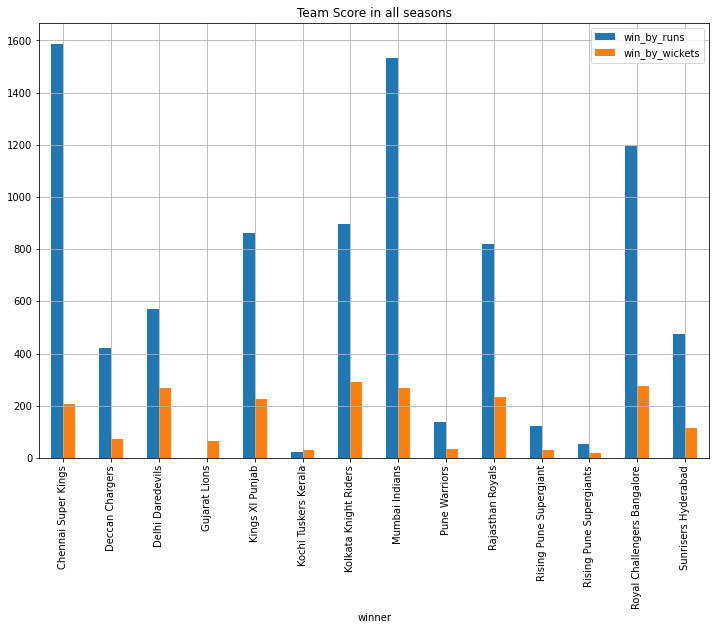

In [14]:
ipm1.plot(kind='bar',figsize=(12,8),grid=True,title='Team Score in all seasons')

In [16]:
# number of players dissmissed by a bowler
ipd1=ipl_deliveries.groupby(by='bowler').count()[['player_dismissed']]
#total number of runs given away by the bowler
ipd2=ipl_deliveries.groupby(by='bowler').sum()[['total_runs']]
#number of matches played by each player
ipd3=pd.DataFrame(ipl_deliveries.groupby(by='bowler')[['match_id']].nunique())
bowler=pd.concat([ipd1,ipd2,ipd3],axis=1)

In [17]:
bowler=bowler.sort_values('match_id',ascending=False).reset_index()

In [18]:
bowler.head()

,bowler,player_dismissed,total_runs,match_id
0,Harbhajan Singh,136,3453,134
1,PP Chawla,133,3315,128
2,A Mishra,142,3305,126
3,P Kumar,102,3342,119
4,RA Jadeja,89,2540,112


In [19]:
from mpl_toolkits.mplot3d import Axes3D

In [20]:
Z=(bowler.total_runs/(bowler.match_id*6))

In [21]:
#fig=plt.figure(figsize=(10,12))
#ax=fig.add_subplot(111,projection='3d',facecolor='c')
#ax.plot(xs=bowler.player_dismissed,ys=bowler.total_runs)
#ax.plot_wireframe(X=bowler.player_dismissed,Y=bowler.total_runs,Z=(bowler.total_runs/(bowler.match_id*6)),rcount=1000)
#ax.set_xlabel('Players_dismissed in all IPL seasons')
#ax.set_ylabel('Runs given away by bowlers')
#ax.set_zlabel('Bowling average throughout the seasons')

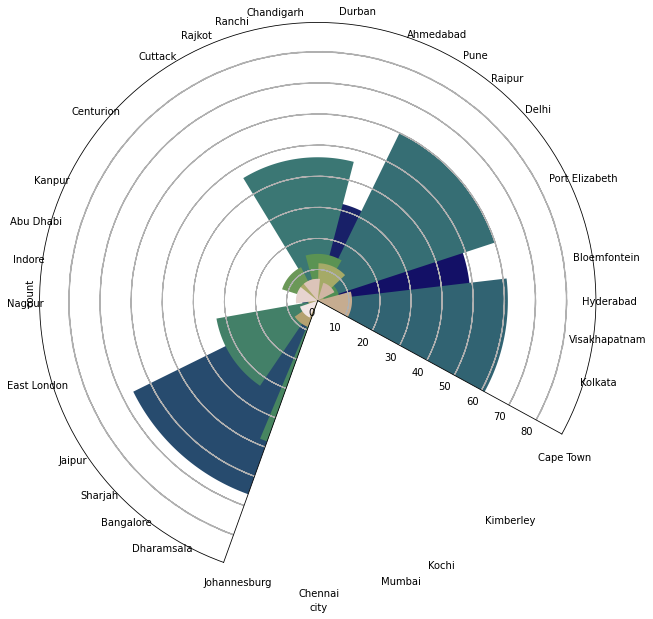

In [22]:
fig=plt.figure(figsize=(10,12))
plt.subplot(polar=True)
sns.countplot(x='city',data=ipl_matches,palette='gist_earth')

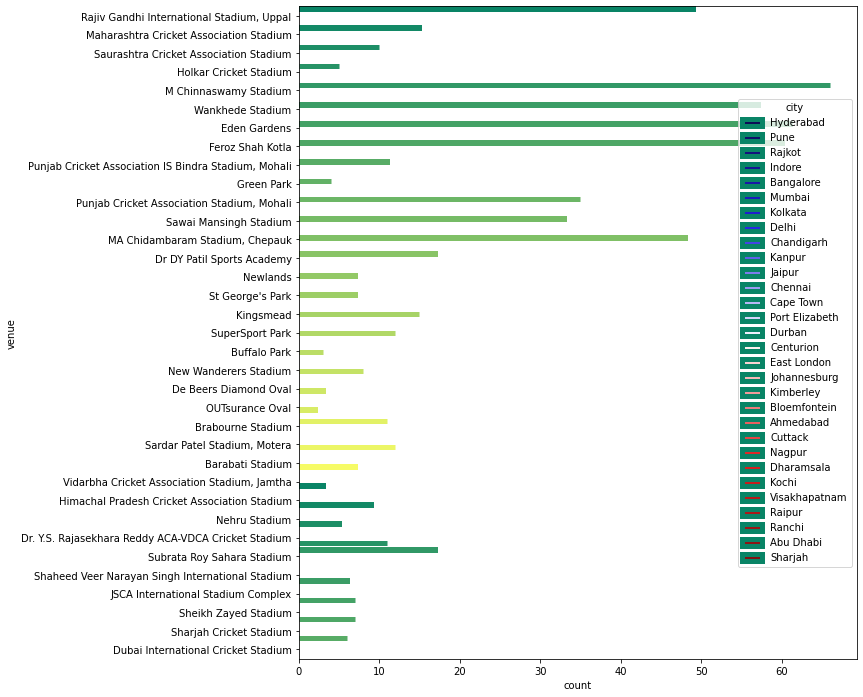

In [23]:
fig=plt.figure(figsize=(10,12))
plt.subplot(polar=False)
sns.countplot(y='venue',hue='city',data=ipl_matches,palette='seismic',linewidth=5,edgecolor=sns.color_palette("summer",25))

In [24]:
total_win=ipl_matches.groupby(['season','winner']).count()[['id']].reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'zborder', 'n_level'



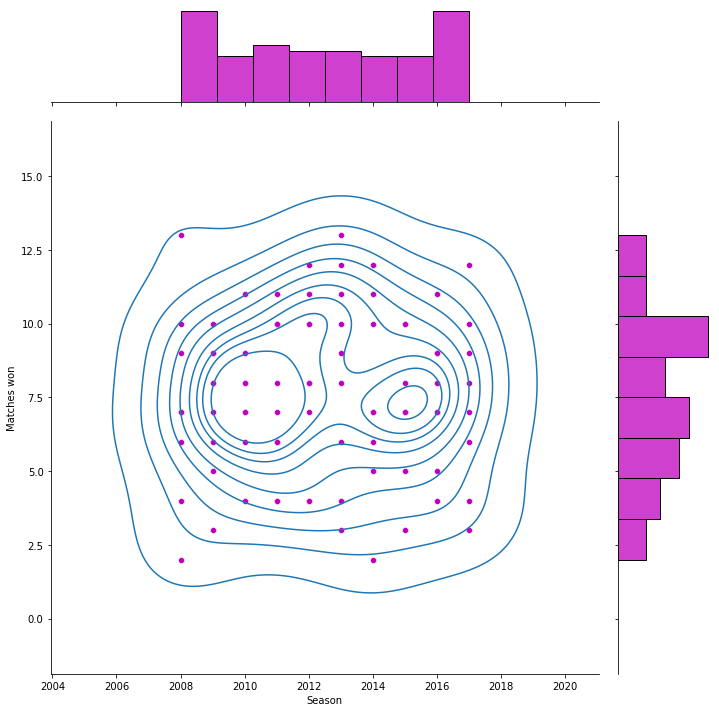

In [25]:
(sns.jointplot(x='season',y='id',data=total_win,size=10,ratio=5,color='m').plot_joint(sns.kdeplot,zborder=0,n_level=6)).set_axis_labels("Season", "Matches won")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



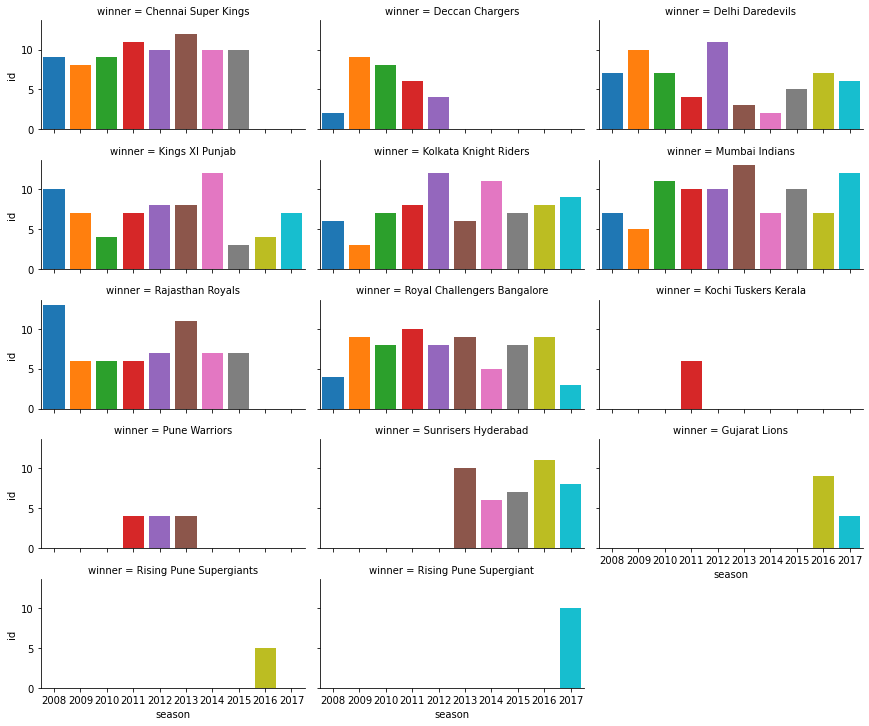

In [26]:
sns.factorplot(data=total_win,x='season',y='id',col='winner',col_wrap=3,size=2,kind='bar',aspect=2,saturation=2,
margin_titles=True)

In [27]:
team_stats=pd.DataFrame({'TotalMatches': ipl_matches.team1.value_counts()+ipl_matches.team2.value_counts()
                         ,'TotalWin':ipl_matches.winner.value_counts()})

team_stats=team_stats.reset_index()

team_stats.rename(columns={'index':'Teams'},inplace=True)

In [28]:
team_stats.head(10)


,Teams,TotalMatches,TotalWin
0,Chennai Super Kings,131,79
1,Deccan Chargers,75,29
2,Delhi Daredevils,147,62
3,Gujarat Lions,30,13
4,Kings XI Punjab,148,70
5,Kochi Tuskers Kerala,14,6
6,Kolkata Knight Riders,148,77
7,Mumbai Indians,157,92
8,Pune Warriors,46,12
9,Rajasthan Royals,118,63


In [32]:
trace_TMatch = Bar(x=team_stats.Teams,
                  y=team_stats.TotalMatches,
                  name='Total Matches Played',
                  marker=dict(color='#ffcdd2'))

trace_WMatch = Bar(x=team_stats.Teams,
                y=team_stats.TotalWin,
                name='Matches Won',
                marker=dict(color='#A2D5F2'))

data = [trace_TMatch, trace_WMatch]
layout = Layout(title="Win vs Los comparison for each team",
                xaxis=dict(title='Teams'),
                yaxis=dict(title='Number of Matches '))
fig = Figure(data=data, layout=layout)

iplot(fig,filename='stackbar')


In [33]:
# The final match of the year is the one we need so we remove all the duplicates from the data 
# and only keep the last row of the subset
season_winner=ipl_matches.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


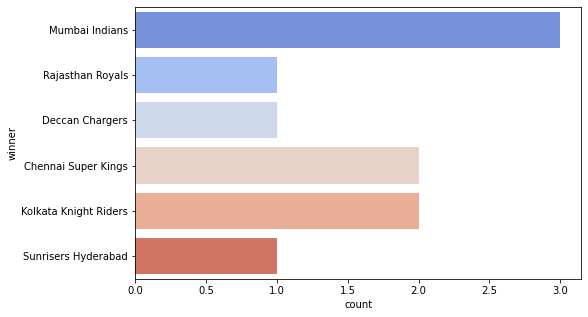

In [34]:
fig=plt.figure(figsize=(8,5))
plt.subplot()
sns.countplot(y='winner',data=season_winner,palette='coolwarm')